![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+GenAI%2Fresources&file=Create+Files+For+Multimodal+Prompt+Examples.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520GenAI%2Fresources%2FCreate%2520Files%2520For%2520Multimodal%2520Prompt%2520Examples.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Coreate Files For Multimodal Prompt Examples

This notebook makes example audio, video, image, and pdf content for other workflows in this series: [Applied GenAI](./Applied%20GenAI/readme.md)

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [2]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [3]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [4]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform', '1.69.0'),
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [5]:
!gcloud services enable aiplatform.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [6]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [7]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [8]:
REGION = 'us-central1'
SERIES = 'applied-genai'
EXPERIMENT = 'gemini-api'

packages:

In [25]:
import os, io, base64

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Markdown, HTML

from google.cloud import aiplatform
import vertexai
import vertexai.generative_models # for Gemini Models

In [26]:
aiplatform.__version__

'1.69.0'

clients:

In [27]:
vertexai.init(project = PROJECT_ID, location = REGION)

Parameters:

In [28]:
DIR = f"files/{EXPERIMENT}"

Environment:

In [29]:
if not os.path.exists(DIR):
    os.makedirs(DIR)

---
## Create Image

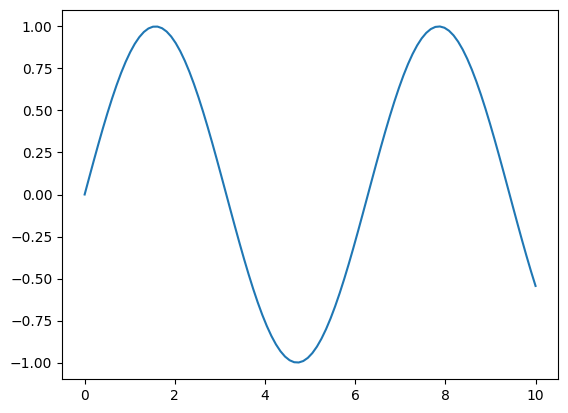

In [30]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

buffer = io.BytesIO()
plt.savefig(buffer, format = 'png')
plot_bytes = buffer.getvalue()

# Save 
plt.savefig(f'{DIR}/plot.jpeg', format='jpeg')
plt.savefig(f'{DIR}/plot.png', format='png')
plt.savefig(f'{DIR}/plot.webp', format='webp')

plt.show()

---
## Create Video

In [36]:
#!sudo apt-get install -y ffmpeg

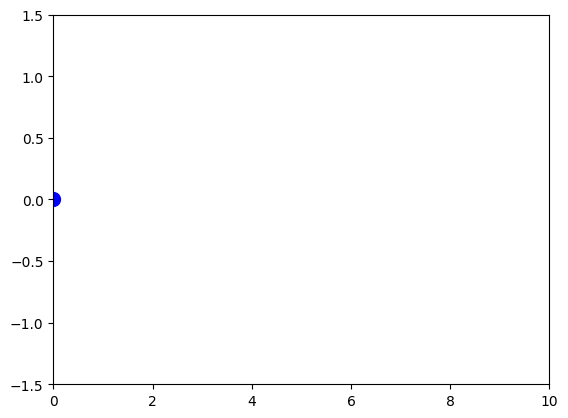

In [37]:
# Initialize the plot
fig, ax = plt.subplots()

# Set the x and y axis limits
ax.set_xlim(0, 10)  # Adjust the x-axis range if needed
ax.set_ylim(-1.5, 1.5)  # Adjust the y-axis range if needed

# Create the blue circle
circle = plt.scatter(x[0], y[0], s=100, c='blue')

# Animation update function
def animate(i):
    circle.set_offsets([x[i], y[i]])
    return circle,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=50)

# Save the animation as an MP4 file
writer = animation.FFMpegWriter(fps=30, codec='libx264')
ani.save(f'{DIR}/video.mp4', writer=writer)

# Embed the animation in the notebook
#plt.clf()
HTML(ani.to_jshtml())

---
## Create Audio

Use llm to get description of sin curve.  Then use TTS to create audio.

---
## Create PDF